In [41]:
import pandas
import matplotlib.pyplot as plt
import scipy.stats as stats
enade2015=pandas.read_csv("MICRODADOS_ENADE_2015.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                     'NT_GER':str,
                                                                     'NT_FG':str,
                                                                     'NT_OBJ_FG':str,
                                                                     'NT_DIS_FG':str,
                                                                     'NT_CE':str,
                                                                     'NT_OBJ_CE':str,
                                                                     'NT_DIS_CE':str})


enade2015.shape

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(549487, 141)

In [42]:
enade2015.columns[0:10]

Index(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO', 'CO_CURSO',
       'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO'],
      dtype='object')

In [43]:
tabela15 = pandas.DataFrame(enade2015, columns=['NT_GER', 'CO_CATEGAD', 'CO_UF_CURSO', 'QE_I08', 'QE_I10'])
tabela15.head(10)

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
0,NaN,10002,51,NaN,NaN
1,66,10002,51,E,D
2,54.7,10002,51,E,A
3,77.1,10002,51,D,D
4,78.5,10002,51,F,D
5,63.3,10002,51,A,A
6,65.4,10002,51,F,E
7,53.7,10002,51,E,A
8,55.7,10002,51,F,A
9,72.4,10002,51,D,A


In [44]:
tabela15['NT_GER'] = tabela15['NT_GER'].str.replace(',', '.')
tabela15=tabela15.loc[(tabela15['NT_GER'].notnull())]
tabela15['NT_GER'] = pandas.to_numeric(tabela15['NT_GER'])
#tabela15.head()

In [45]:
tabela15=tabela15.loc[(tabela15['QE_I08'].notnull())]
tabela15=tabela15.loc[(tabela15['QE_I10'].notnull())]

tabela15['QE_I08'] = tabela15['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6,'G':7})
tabela15['QE_I10'] = tabela15['QE_I10'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5})
tabela15.head()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
1,66.0,10002,51,5,4
2,54.7,10002,51,5,1
3,77.1,10002,51,4,4
4,78.5,10002,51,6,4
5,63.3,10002,51,1,1


In [46]:
tabela15['NT_GER'].mean()

44.522485219027246

In [47]:
tabela15['NT_GER'].describe()

count    446520.000000
mean         44.522485
std          13.970354
min           0.000000
25%          34.500000
50%          43.800000
75%          54.100000
max          95.500000
Name: NT_GER, dtype: float64

In [48]:
print('indice da primeira maior nota 2015: ', tabela15['NT_GER'].idxmax())
print('Maior nota: ', tabela15['NT_GER'][516661])
#print(tabela['NT_GER'].idxmax())

indice da primeira maior nota 2015:  516661
Maior nota:  95.5


In [49]:
#UF15 = tabela15[tabela15['CO_UF_CURSO']==31]


In [50]:
#UF15['NT_GER'].describe()

In [51]:
#CATEGORIA DA UNIVERSIDADE
#2015
#Pública = 1
#Privada = 2

#tabela15 = tabela15.loc[(tabela15['CO_CATEGAD'].notnull())]
#tabela15['CO_CATEGAD'] = tabela15['CO_CATEGAD'].map({'93': 1, '115':1, '116':1, '118':2, '121':2, '10001':1, '10002':1, '10003':1,
#                                                    '10004':2,'10005':2,'10006':2,'10007':2,'10008':2,'10009':2})
#UF15 = tabela15[tabela15['CO_UF_CURSO']==31]

tabela15 = tabela15.loc[(tabela15['CO_CATEGAD'].notnull())]
tabela15['CO_CATEGAD'] = tabela15['CO_CATEGAD'].map({93: 1, 115:1, 116:1, 118:2, 121:2, 10001:1, 10002:1, 10003:1,
                                                    10004:2,10005:2,10006:2,10007:2,10008:2,10009:2})

CAT15Pub = tabela15[tabela15['CO_CATEGAD']==1]
CAT15Pub.describe()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
count,62152.000000,62152.0,62152.000000,62152.000000,62152.000000
mean,50.214968,1.0,33.073175,3.690082,3.076731
std,15.270897,0.0,9.783728,1.695337,1.781644
min,0.000000,1.0,11.000000,1.000000,1.000000
25%,39.700000,1.0,26.000000,2.000000,1.000000
50%,50.700000,1.0,33.000000,4.000000,4.000000
75%,61.400000,1.0,41.000000,5.000000,5.000000
max,95.500000,1.0,53.000000,7.000000,5.000000


In [52]:
CAT15Priv = tabela15[tabela15['CO_CATEGAD']==2]
CAT15Priv.describe()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
count,384368.000000,384368.0,384368.000000,384368.000000,384368.000000
mean,43.602015,2.0,35.543625,3.398553,3.545488
std,13.525347,0.0,8.589780,1.616955,1.726588
min,0.000000,2.0,11.000000,1.000000,1.000000
25%,33.900000,2.0,31.000000,2.000000,1.000000
50%,42.800000,2.0,35.000000,3.000000,5.000000
75%,52.800000,2.0,41.000000,5.000000,5.000000
max,95.400000,2.0,53.000000,7.000000,5.000000


In [53]:
#somente as notas de quem respondeu a questão sobre a renda
CAT15Priv=CAT15Priv.loc[(CAT15Priv['QE_I08'].notnull())]
CAT15Priv.NT_GER.describe()

count    384368.000000
mean         43.602015
std          13.525347
min           0.000000
25%          33.900000
50%          42.800000
75%          52.800000
max          95.400000
Name: NT_GER, dtype: float64

In [54]:
#somente as notas de quem respondeu a questão sobre a situacao de trabalho
CAT15Priv=CAT15Priv.loc[(CAT15Priv['QE_I10'].notnull())]
CAT15Priv.NT_GER.describe()

count    384368.000000
mean         43.602015
std          13.525347
min           0.000000
25%          33.900000
50%          42.800000
75%          52.800000
max          95.400000
Name: NT_GER, dtype: float64

In [55]:
CAT15Priv.QE_I08.head(10)

3540    6
3541    3
3542    6
3543    5
3544    6
3547    2
3548    5
3549    6
3550    5
3551    2
Name: QE_I08, dtype: int64

In [56]:
CAT15Priv.QE_I10.head(10)

3540    5
3541    3
3542    2
3543    3
3544    1
3547    1
3548    1
3549    4
3550    1
3551    1
Name: QE_I10, dtype: int64

In [57]:
#somente as notas de quem respondeu a questão sobre a situação de trabalho
#2015 publica
CAT15Pub=CAT15Pub.loc[(CAT15Pub['QE_I10'].notnull())]
CAT15Pub.NT_GER.describe()

count    62152.000000
mean        50.214968
std         15.270897
min          0.000000
25%         39.700000
50%         50.700000
75%         61.400000
max         95.500000
Name: NT_GER, dtype: float64

In [58]:
#somente as notas de quem respondeu a questão sobre a renda
CAT15Pub=CAT15Pub.loc[(CAT15Pub['QE_I08'].notnull())]
CAT15Pub.NT_GER.describe()

count    62152.000000
mean        50.214968
std         15.270897
min          0.000000
25%         39.700000
50%         50.700000
75%         61.400000
max         95.500000
Name: NT_GER, dtype: float64

In [59]:
CAT15Pub.QE_I08.head(10)

1     5
2     5
3     4
4     6
5     1
6     6
7     5
8     6
9     4
10    4
Name: QE_I08, dtype: int64

In [60]:
CAT15Pub.QE_I10.head(10)

1     4
2     1
3     4
4     4
5     1
6     5
7     1
8     1
9     1
10    5
Name: QE_I10, dtype: int64

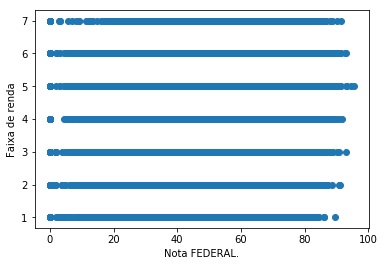

In [61]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT15Pub.NT_GER, CAT15Pub.QE_I08)
plt.ylabel('Faixa de renda')
plt.xlabel('Nota FEDERAL.')
plt.show()

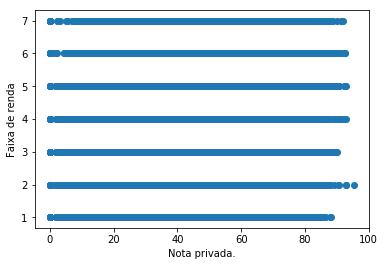

In [62]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT15Priv.NT_GER, CAT15Priv.QE_I08)
plt.ylabel('Faixa de renda')
plt.xlabel('Nota privada.')
plt.show()

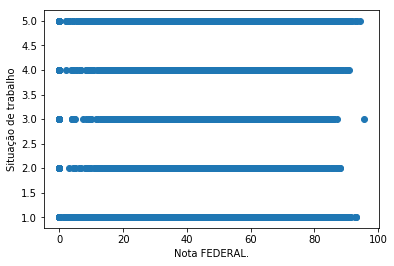

In [63]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT15Pub.NT_GER, CAT15Pub.QE_I10)
plt.ylabel('Situação de trabalho')
plt.xlabel('Nota FEDERAL.')
plt.show()

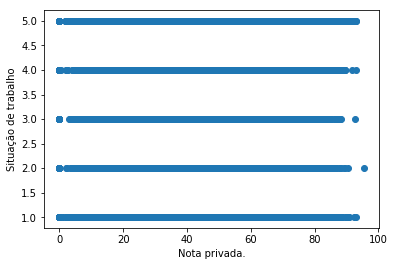

In [64]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT15Priv.NT_GER, CAT15Priv.QE_I10)
plt.ylabel('Situação de trabalho')
plt.xlabel('Nota privada.')
plt.show('2015')

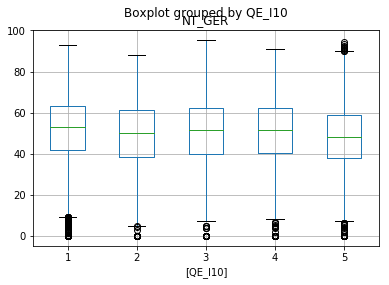

In [65]:
pub10 = pandas.DataFrame(CAT15Pub, columns=['NT_GER', 'QE_I10'])
pub10.boxplot(by='QE_I10')


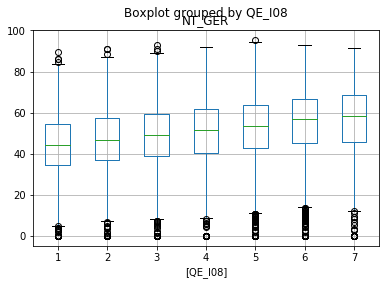

In [66]:
pub08 = pandas.DataFrame(CAT15Pub, columns=['NT_GER', 'QE_I08'])
pub08.boxplot(by='QE_I08')

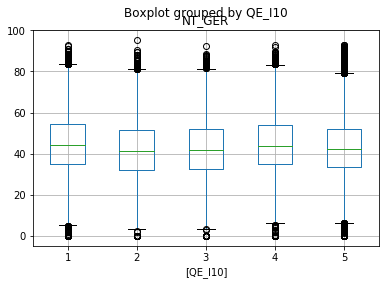

In [67]:
priv10 = pandas.DataFrame(CAT15Priv, columns=['NT_GER', 'QE_I10'])
#priv10.head(10)
#qe22.boxplot(by='QE_I10')
priv10.boxplot(by='QE_I10')

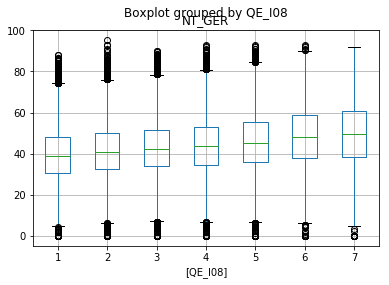

In [68]:
priv08 = pandas.DataFrame(CAT15Priv, columns=['NT_GER', 'QE_I08'])
priv08.boxplot(by='QE_I08')

In [69]:
'''DOS ESTUDANTES DE ESCOLA PÚBLICA QUE TRABALHAM >=40 HORAS POR SEMANA '''
trabalhopub1=pub10.loc[pub10.QE_I10 ==5]
print(trabalhopub1.NT_GER.describe())


count    23239.000000
mean        48.279689
std         14.654082
min          0.000000
25%         37.900000
50%         48.100000
75%         58.700000
max         94.400000
Name: NT_GER, dtype: float64


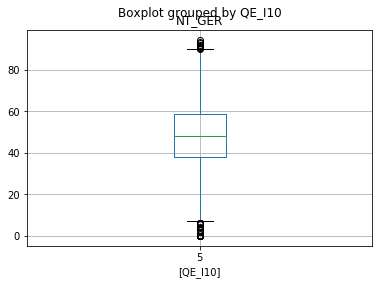

In [70]:
#40 horas
a=pandas.DataFrame(trabalhopub1, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

In [71]:
'''DOS ESTUDANTES DE ESCOLA PRIVADA QUE TRABALHAM >=40 HORAS POR SEMANA '''
trabalhopriv1=priv10.loc[priv10.QE_I10 ==5]
print(trabalhopriv1.NT_GER.describe())

count    195602.000000
mean         42.997575
std          13.170562
min           0.000000
25%          33.600000
50%          42.200000
75%          51.800000
max          92.900000
Name: NT_GER, dtype: float64


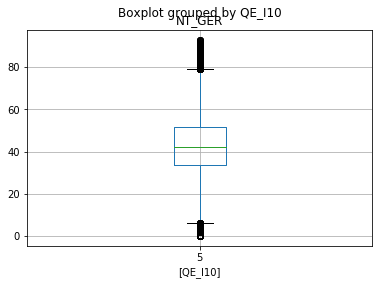

In [72]:
#40 horas
a=pandas.DataFrame(trabalhopriv1, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

In [73]:
'''DOS ESTUDANTES DE ESCOLA PÚBLICA QUE NAO TRABALHAM '''
trabalhopub=pub10.loc[pub10.QE_I10 ==1]
print(trabalhopub.NT_GER.describe())


count    23322.000000
mean        51.969008
std         15.457342
min          0.000000
25%         41.700000
50%         53.000000
75%         63.300000
max         93.100000
Name: NT_GER, dtype: float64


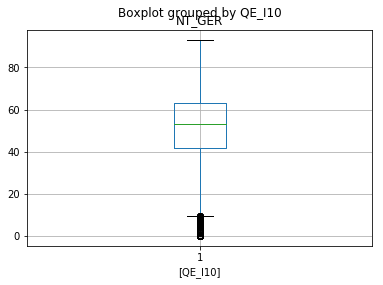

In [74]:
a=pandas.DataFrame(trabalhopub, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

In [75]:
'''DOS ESTUDANTES DE ESCOLA PRIVADA QUE NAO TRABALHAM '''
trabalhopriv=priv10.loc[priv10.QE_I10 ==1]
print(trabalhopriv.NT_GER.describe())

count    103282.000000
mean         44.721633
std          13.759438
min           0.000000
25%          34.800000
50%          44.100000
75%          54.300000
max          92.900000
Name: NT_GER, dtype: float64


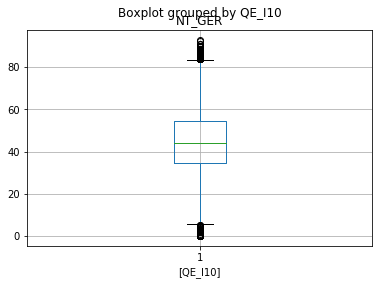

In [76]:
#não trabalham
a=pandas.DataFrame(trabalhopriv, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

In [78]:
""" DOS ESTUDANTES DE ESCOLA PUBLICA COM A RENDA DE ATÉ 1,5 SALÁRIO MINIMO"""
rendapub1=pub08.loc[pub08.QE_I08 ==1]
print(rendapub1.NT_GER.describe())

count    6075.000000
mean       44.671539
std        14.316242
min         0.000000
25%        34.700000
50%        44.300000
75%        54.650000
max        89.400000
Name: NT_GER, dtype: float64


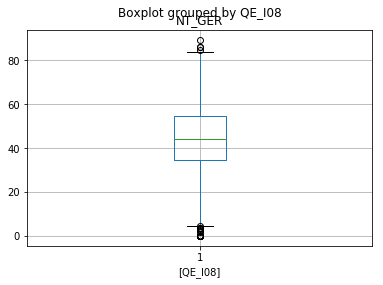

In [79]:
a=pandas.DataFrame(rendapub1, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')

In [80]:
""" DOS ESTUDANTES DE ESCOLA PRIVADA COM A RENDA DE ATÉ 1,5 SALÁRIO MINIMO"""
rendapriv1=priv08.loc[priv08.QE_I08 ==1]
print(rendapriv1.NT_GER.describe())

count    40126.000000
mean        39.963278
std         12.953256
min          0.000000
25%         30.700000
50%         38.800000
75%         48.200000
max         88.000000
Name: NT_GER, dtype: float64


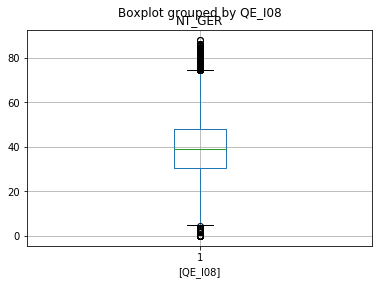

In [82]:
a=pandas.DataFrame(rendapriv1, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')

In [83]:
""" DOS ESTUDANTES DE ESCOLA PUBLICA COM A RENDA DE 10 a 30 SALÁRIOS MINIMOS"""
rendapub=pub08.loc[pub08.QE_I08 == 6]
print(rendapub.NT_GER.describe())

count    9606.000000
mean       55.109536
std        15.427382
min         0.000000
25%        45.400000
50%        56.800000
75%        66.475000
max        93.100000
Name: NT_GER, dtype: float64


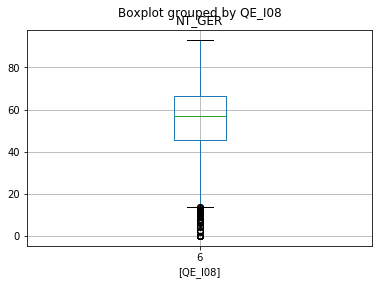

In [84]:
a=pandas.DataFrame(rendapub, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')

In [85]:
""" DOS ESTUDANTES DE ESCOLA PRIVADA COM A RENDA DE 10 a 30 SALÁRIOS MINIMOS"""
rendapriv=priv08.loc[priv08.QE_I08 == 6]
print(rendapriv.NT_GER.describe())

count    39848.000000
mean        48.162794
std         14.525457
min          0.000000
25%         37.700000
50%         48.200000
75%         58.700000
max         92.600000
Name: NT_GER, dtype: float64


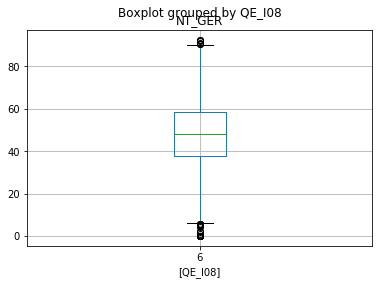

In [86]:
a=pandas.DataFrame(rendapriv, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')